# a) Tabular Diverse Set Data Mining Assignment on

Kaggle dataset used House Prices:

* Description: Predicting house prices based on a variety of features.
* Features: SalePrice, MSSubClass, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, etc.

 - https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

## Installing dependencies

In [ ]:
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 49.0 MB/s eta 0:00:00


## Load the data.

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/train.csv')

# Display the first few rows of the dataset
data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Check for missing values.

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()

# Filter out columns with missing values
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

# Display the columns with missing values and their counts
missing_values


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

Here's a summary of the columns with missing values:

1. PoolQC: 1453 missing values
2. MiscFeature: 1406 missing values
3. Alley: 1369 missing values
4. Fence: 1179 missing values
5. FireplaceQu: 690 missing values
6. LotFrontage: 259 missing values
7. GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond: 81 missing values each
8. BsmtExposure, BsmtFinType2: 38 missing values each
9. BsmtFinType1, BsmtCond, BsmtQual: 37 missing values each
10. MasVnrArea, MasVnrType: 8 missing values each
11. Electrical: 1 missing value

## Visualize distributions of key features.

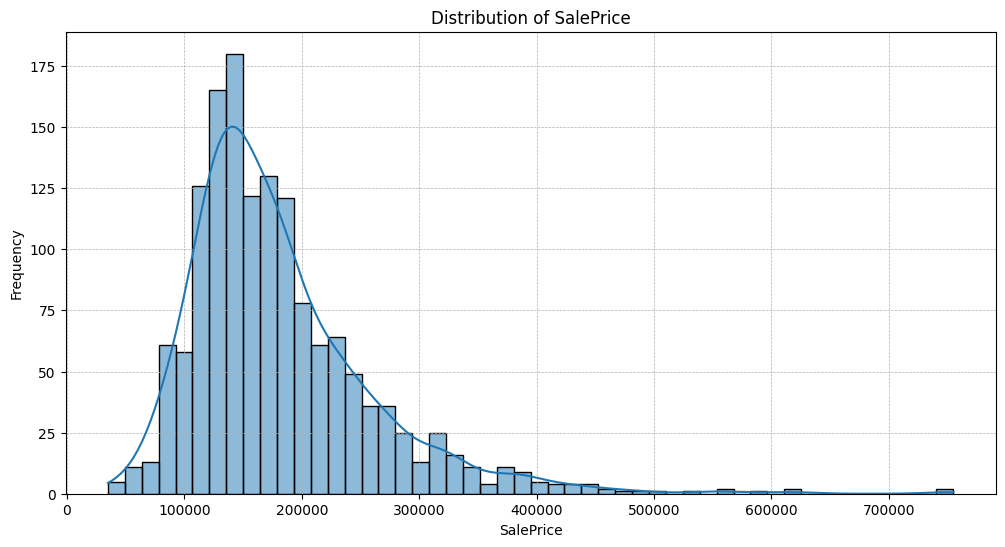

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure size
plt.figure(figsize=(12, 6))

# Plot distribution of SalePrice
sns.histplot(data['SalePrice'], bins=50, kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


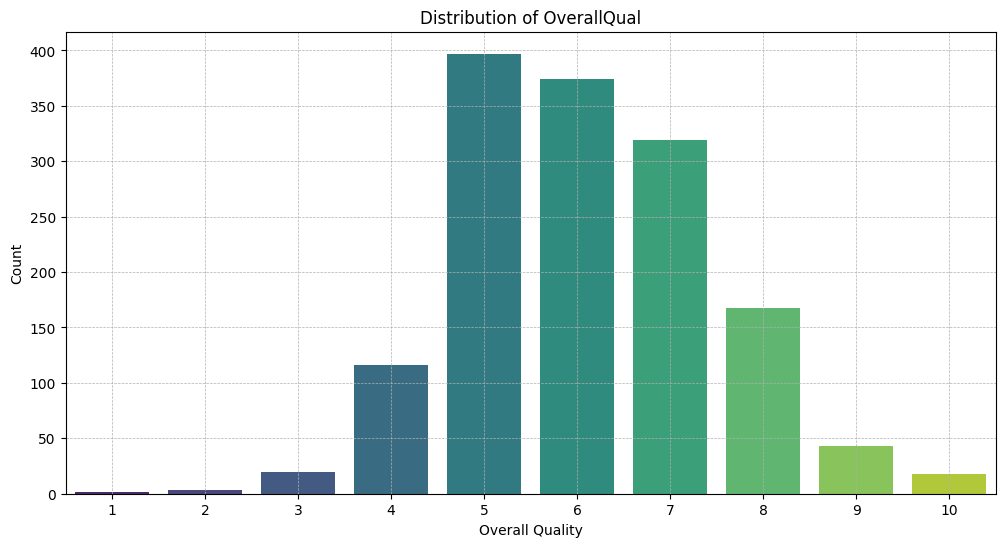

In [ ]:
# Set up the figure size
plt.figure(figsize=(12, 6))

# Plot distribution of OverallQual
sns.countplot(x='OverallQual', data=data, palette='viridis')
plt.title('Distribution of OverallQual')
plt.xlabel('Overall Quality')
plt.ylabel('Count')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


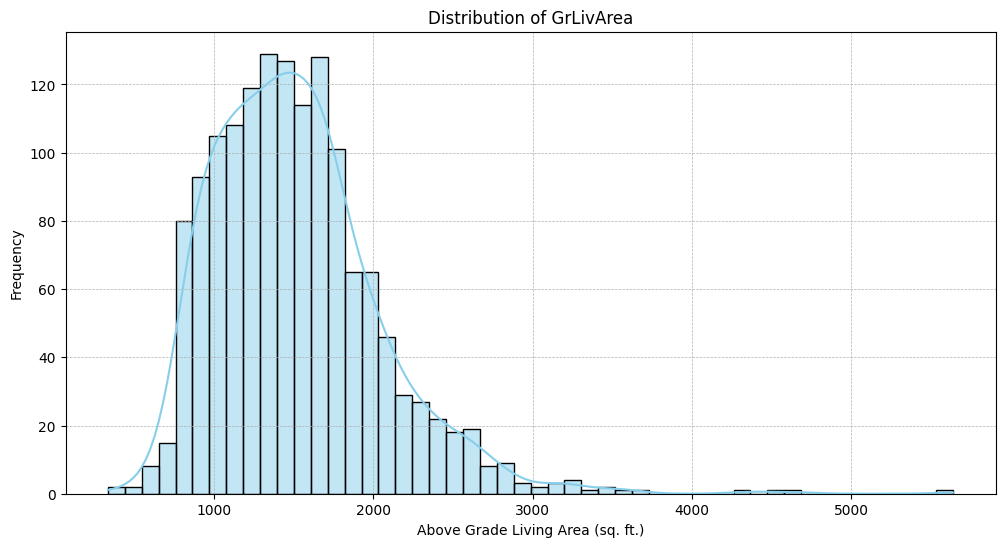

In [ ]:
# Set up the figure size
plt.figure(figsize=(12, 6))

# Plot distribution of GrLivArea
sns.histplot(data['GrLivArea'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of GrLivArea')
plt.xlabel('Above Grade Living Area (sq. ft.)')
plt.ylabel('Frequency')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


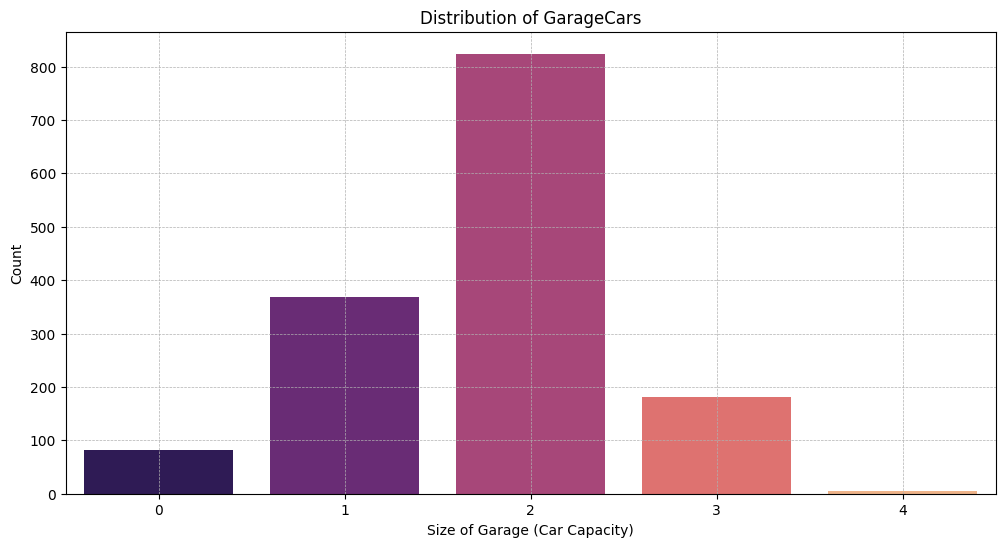

In [ ]:
# Set up the figure size
plt.figure(figsize=(12, 6))

# Plot distribution of GarageCars
sns.countplot(x='GarageCars', data=data, palette='magma')
plt.title('Distribution of GarageCars')
plt.xlabel('Size of Garage (Car Capacity)')
plt.ylabel('Count')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


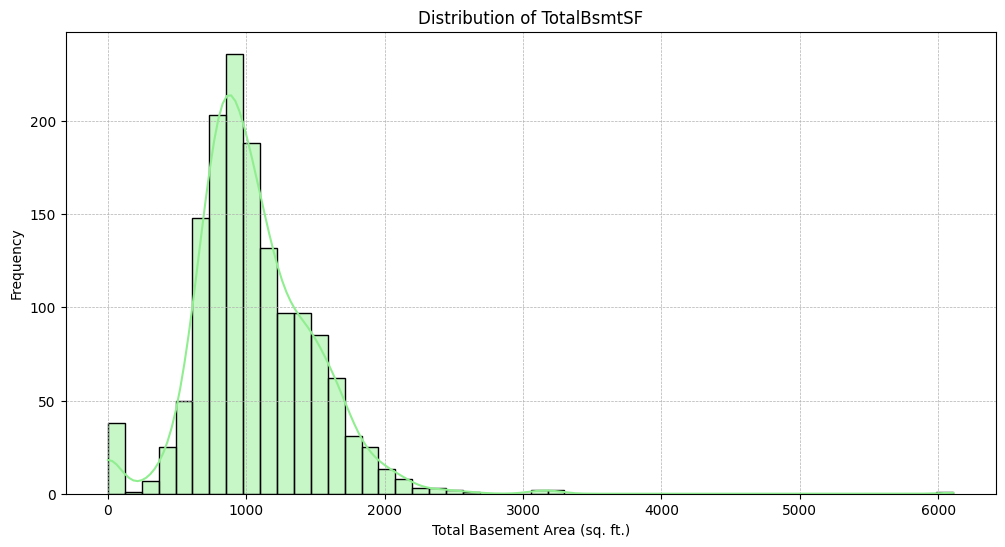

In [ ]:
# Set up the figure size
plt.figure(figsize=(12, 6))

# Plot distribution of TotalBsmtSF
sns.histplot(data['TotalBsmtSF'], bins=50, kde=True, color='lightgreen')
plt.title('Distribution of TotalBsmtSF')
plt.xlabel('Total Basement Area (sq. ft.)')
plt.ylabel('Frequency')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


## Check for correlations between features.

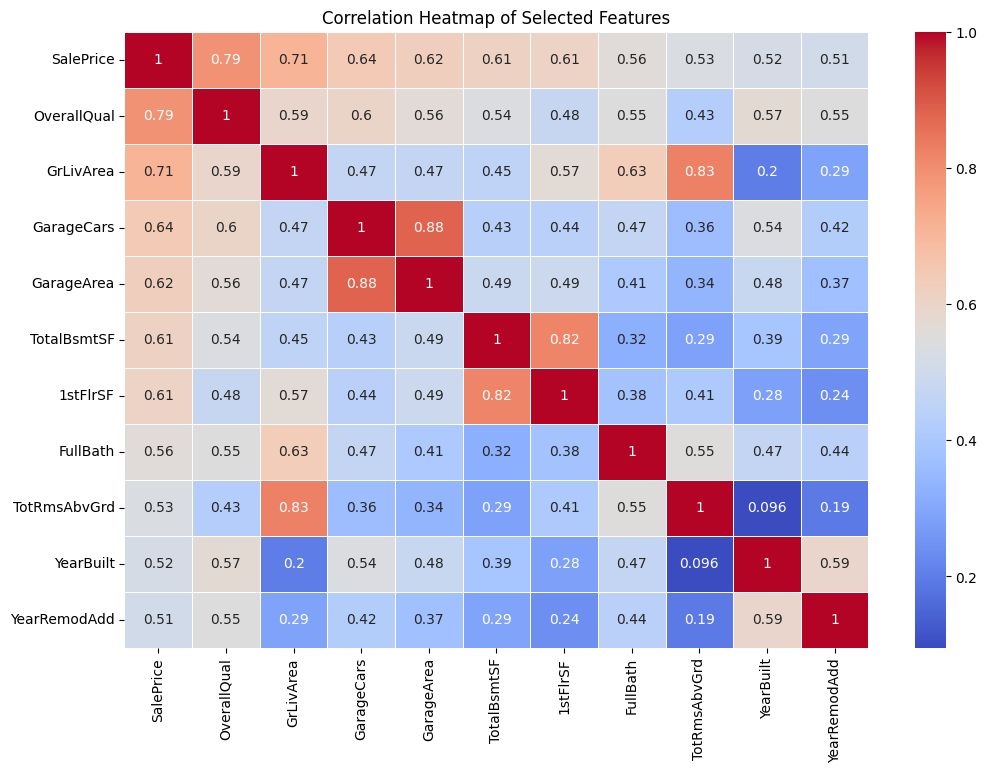

In [ ]:
# Select a subset of features
selected_features = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']

# Compute the correlation matrix
correlation_matrix = data[selected_features].corr()

# Set up the figure size
plt.figure(figsize=(12, 8))

# Generate a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Selected Features')
plt.show()


Some key takeaways:

* OverallQual has a strong positive correlation (0.79) with SalePrice, suggesting that as the overall quality of a house increases, its sale price tends to increase as well.
* GrLivArea, GarageCars, GarageArea, TotalBsmtSF, and 1stFlrSF also have strong positive correlations with SalePrice.
* YearBuilt and YearRemodAdd have moderate positive correlations with SalePrice, indicating that newer houses or those that have been recently remodeled tend to have higher sale prices.
* Some features are correlated with each other, such as GarageCars and GarageArea, which is expected since a larger garage can typically accommodate more cars.

## Use auto EDA tools like Sweetviz for detailed reports.

In [ ]:
import sweetviz as sv

# Generate the Sweetviz report
report = sv.analyze(data)

# Save the report to an HTML file
report_file_path = "sweetviz_report.html"
report.show_html(report_file_path)

report_file_path


                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


'sweetviz_report.html'

In [ ]:
report.show_html(report_file_path)

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Data Preprocessing

### Handle missing values (imputation or removal)

In [ ]:
# Handling missing values

# Features where NaN can be interpreted as "None"
none_features = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish',
                 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType']
for feature in none_features:
    data[feature].fillna("None", inplace=True)

# Features where NaN can be interpreted as "0"
zero_features = ['GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea']
for feature in zero_features:
    data[feature].fillna(0, inplace=True)

# For 'LotFrontage', we can use median value of the neighborhood as an approximation
data['LotFrontage'] = data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

# For 'Electrical', we fill NaN with the most common value
data['Electrical'].fillna(data['Electrical'].mode()[0], inplace=True)

# Check remaining missing values
remaining_missing = data.isnull().sum().max()

remaining_missing


0

### Remove duplicates:

In [ ]:
# Remove duplicates
initial_rows = data.shape[0]
data.drop_duplicates(inplace=True)
remaining_rows = data.shape[0]

# Calculate number of duplicates removed
duplicates_removed = initial_rows - remaining_rows

duplicates_removed


0

### Handle outliers:

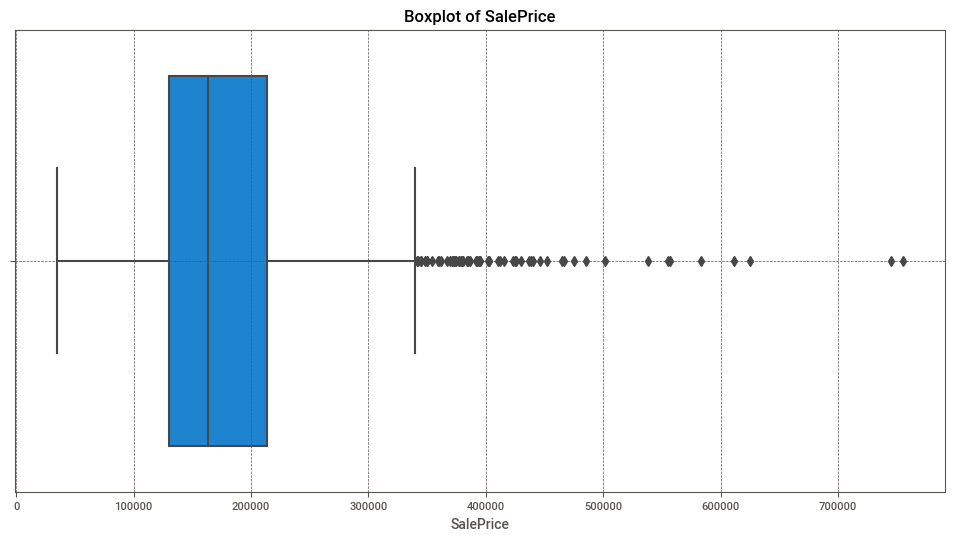

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure size
plt.figure(figsize=(12, 6))

# Plot boxplot for SalePrice to visualize outliers
sns.boxplot(x=data['SalePrice'])
plt.title('Boxplot of SalePrice')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


In [ ]:
# Calculate Q1 and Q3
Q1 = data['SalePrice'].quantile(0.25)
Q3 = data['SalePrice'].quantile(0.75)

# Compute IQR
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to remove outliers
data_outliers_removed = data[(data['SalePrice'] >= lower_bound) & (data['SalePrice'] <= upper_bound)]

# Number of rows removed
rows_removed = data.shape[0] - data_outliers_removed.shape[0]

rows_removed


61

## Feature Engineering:

Create new features based on domain knowledge:

Based on domain knowledge, we can create new features that might be relevant for predicting house prices. Some potential new features include:

1. **TotalSF**: Total square footage of the house (sum of basement, first floor, and second floor areas).
2. **Age**: Age of the house at the time of sale.
3. **HasRemodel**: A binary feature indicating whether the house has been remodeled.

In [ ]:
# Create new features
data_outliers_removed['TotalSF'] = data_outliers_removed['TotalBsmtSF'] + data_outliers_removed['1stFlrSF'] + data_outliers_removed['2ndFlrSF']
data_outliers_removed['Age'] = data_outliers_removed['YrSold'] - data_outliers_removed['YearBuilt']
data_outliers_removed['HasRemodel'] = (data_outliers_removed['YearBuilt'] != data_outliers_removed['YearRemodAdd']).astype(int)

# Display the first few rows with the new features
data_outliers_removed[['TotalSF', 'Age', 'HasRemodel']].head()


<ipython-input-17-10ecdc129b6b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_outliers_removed['TotalSF'] = data_outliers_removed['TotalBsmtSF'] + data_outliers_removed['1stFlrSF'] + data_outliers_removed['2ndFlrSF']
<ipython-input-17-10ecdc129b6b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_outliers_removed['Age'] = data_outliers_removed['YrSold'] - data_outliers_removed['YearBuilt']
<ipython-input-17-10ecdc129b6b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

,TotalSF,Age,HasRemodel
0,2566,5,0
1,2524,31,0
2,2706,7,1
3,2473,91,1
4,3343,8,0


Convert categorical variables to numerical:

To convert categorical variables into a format suitable for machine learning models, we can use methods like one-hot encoding or label encoding. One-hot encoding is suitable for nominal categories where no ordinal relationship exists, while label encoding is suitable for ordinal categories.

In [ ]:
# Identify categorical columns
categorical_cols = data_outliers_removed.select_dtypes(include=['object']).columns

# Apply one-hot encoding
data_encoded = pd.get_dummies(data_outliers_removed, columns=categorical_cols, drop_first=True)

# Display the shape and the first few rows of the encoded data
data_encoded.shape, data_encoded.head()


((1399, 264),
    Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
 0   1          60         65.0     8450            7            5       2003   
 1   2          20         80.0     9600            6            8       1976   
 2   3          60         68.0    11250            7            5       2001   
 3   4          70         60.0     9550            7            5       1915   
 4   5          60         84.0    14260            8            5       2000   
 
    YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLI  SaleType_ConLw  \
 0          2003       196.0         706  ...               0               0   
 1          1976         0.0         978  ...               0               0   
 2          2002       162.0         486  ...               0               0   
 3          1970         0.0         216  ...               0               0   
 4          2000       350.0         655  ...               0               0   
 
    SaleTy

Normalize/standardize numerical features:

Standardizing or normalizing the numerical features ensures that they have a similar scale. This is particularly important for algorithms that are sensitive to feature scales, such as gradient descent-based algorithms or distance-based algorithms.

We'll use the StandardScaler from scikit-learn to standardize the numerical features.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Identify numeric columns
numeric_cols = data_encoded.select_dtypes(include=['float64', 'int64']).columns

# Exclude the 'Id' column
numeric_cols = [col for col in numeric_cols if col != 'Id']

# Apply standardization
scaler = StandardScaler()
data_encoded[numeric_cols] = scaler.fit_transform(data_encoded[numeric_cols])

# Display the first few rows of the standardized data
data_encoded[numeric_cols].head()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,TotalSF,Age,HasRemodel
0,0.058720,-0.198848,-0.204916,0.792970,-0.528822,1.097354,0.917091,0.667709,0.674064,-0.292015,...,-0.113179,-0.267373,-0.064858,-0.089594,-1.595626,0.135712,0.646235,0.098688,-1.089531,-0.943685
1,-0.876115,0.484719,-0.066726,0.012826,2.154935,0.197316,-0.390176,-0.563734,1.309209,-0.292015,...,-0.113179,-0.267373,-0.064858,-0.089594,-0.485591,-0.617704,0.190222,0.041911,-0.224272,-0.943685
2,0.058720,-0.062135,0.131547,0.792970,-0.528822,1.030684,0.868673,0.454091,0.160344,-0.292015,...,-0.113179,-0.267373,-0.064858,-0.089594,0.994456,0.135712,0.899575,0.287947,-1.022973,1.059676
3,0.292428,-0.426704,-0.072734,0.792970,-0.528822,-1.836103,-0.680680,-0.563734,-0.470131,-0.292015,...,-0.113179,-0.267373,-0.064858,-0.089594,-1.595626,-1.371121,-0.510685,-0.027033,1.772480,1.059676
4,0.058720,0.667003,0.493245,1.573115,-0.528822,0.997350,0.771839,1.635271,0.554974,-0.292015,...,-0.113179,-0.267373,-0.064858,-0.089594,2.104491,0.135712,1.347142,1.149071,-0.989693,-0.943685


## Feature Selection

Feature selection helps in reducing the dimensionality of the data and can lead to improved model performance by removing irrelevant or redundant features.

i) Use techniques like Recursive Feature Elimination (RFE), feature importance from tree-based models, or correlation analysis:
For this demonstration, I'll use two methods for feature selection:

1. Feature Importance from a Tree-based Model (Random Forest): Tree-based models can provide a measure of the importance of each feature in predicting the target variable.
2. Recursive Feature Elimination (RFE) with a linear model (like Linear Regression): RFE recursively removes the least important features and builds a model on the remaining features.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Separate features and target variable
X = data_encoded.drop(['Id', 'SalePrice'], axis=1)
y = data_encoded['SalePrice']

# Instantiate the random forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a dataframe for feature importances
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the dataframe by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
top_features_rf = features_df.head(10)
top_features_rf


,Feature,Importance
3,OverallQual,0.404368
36,TotalSF,0.358834
2,LotArea,0.015934
26,GarageArea,0.014485
15,GrLivArea,0.013848
37,Age,0.013440
6,YearRemodAdd,0.012101
8,BsmtFinSF1,0.011034
10,BsmtUnfSF,0.010475
25,GarageCars,0.008991


Based on the Random Forest model, the top 10 most important features for predicting SalePrice are:

1. OverallQual: Overall material and finish quality of the house.
2. TotalSF: Total square footage of the house.
3. LotArea: Lot size in square feet.
4. GarageArea: Size of the garage in square feet.
5. GrLivArea: Above grade (ground) living area square feet.
6. Age: Age of the house at the time of sale.
7. YearRemodAdd: Remodel date.
8. BsmtFinSF1: Type 1 finished square feet.
9. BsmtUnfSF: Unfinished square feet of basement area.
10. GarageCars: Size of the garage in car capacity.


Next, let's use the Recursive Feature Elimination (RFE) method with a linear model to identify important features. For the sake of efficiency, I'll limit the selection to the top 10 features using RFE with Linear Regression. Let's proceed.

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Instantiate the linear regression model
lr = LinearRegression()

# Use RFE to select the top 10 features
rfe = RFE(estimator=lr, n_features_to_select=10, step=1)
rfe.fit(X, y)

# Get the top features from RFE
top_features_rfe = X.columns[rfe.support_]

top_features_rfe


Index(['Condition2_PosN', 'RoofMatl_CompShg', 'RoofMatl_Membran',
       'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Heating_OthW', 'SaleType_Con'],
      dtype='object')

## Clustering and Anomaly Detection:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

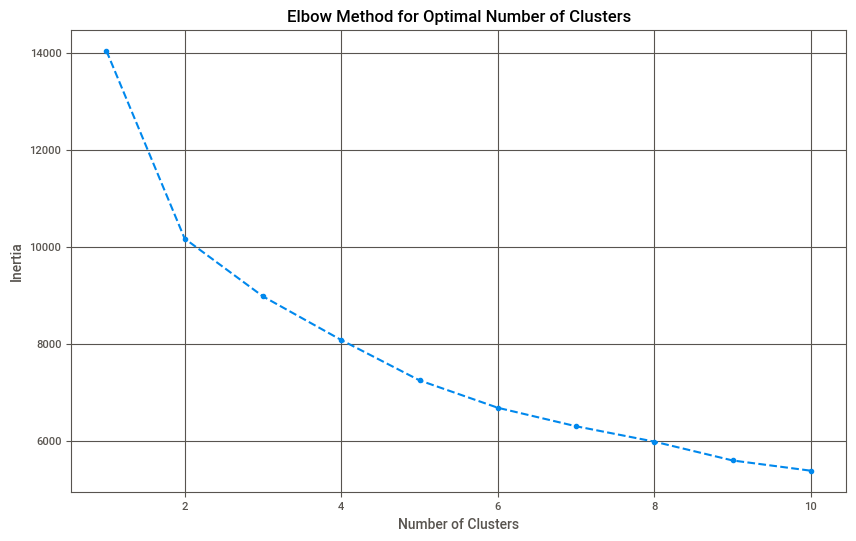

In [ ]:
from sklearn.cluster import KMeans

# Select a subset of features for clustering (combine features from both feature selection methods)
selected_features_for_clustering = list(set(top_features_rf['Feature'].to_list() + top_features_rfe.to_list()))

# Extract the data for these features
X_cluster = data_encoded[selected_features_for_clustering]

# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cluster)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


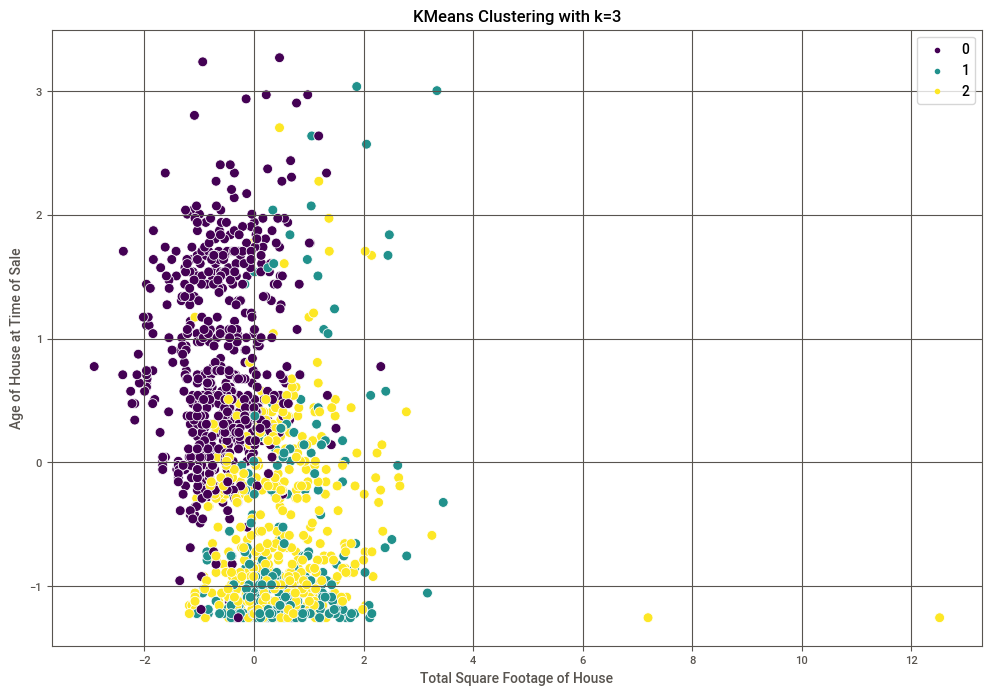

In [ ]:
# Retry KMeans clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_cluster)

# Visualization using scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x=data_encoded['TotalSF'], y=data_encoded['Age'], hue=clusters, palette='viridis', s=50)
plt.title('KMeans Clustering with k=3')
plt.xlabel('Total Square Footage of House')
plt.ylabel('Age of House at Time of Sale')
plt.grid(True)
plt.show()


## Model Building

### Split data into training and test sets:

In [ ]:
from sklearn.model_selection import train_test_split
# Separate features and target variable
X = data_encoded.drop(['Id', 'SalePrice'], axis=1)
y = data_encoded['SalePrice']

# Splitting the data into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((1119, 262), (280, 262))

## Using TPOT for AutoML:

In [ ]:
!pip install pycaret


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 17.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 61.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 68.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 66.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 84.2 MB/s et

In [ ]:
from pycaret.regression import setup,compare_models,create_model,create_model,create_model
exp1 = setup(data, target='SalePrice', session_id=123)


,Description,Value
0,Session id,123
1,Target,SalePrice
2,Target type,Regression
3,Original data shape,"(1460, 81)"
4,Transformed data shape,"(1460, 295)"
5,Transformed train set shape,"(1021, 295)"
6,Transformed test set shape,"(439, 295)"
7,Ordinal features,3
8,Numeric features,37
9,Categorical features,43


#### Evaluate on Test Data:

In [ ]:
compare_models()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,17410.8247,898779847.8066,29006.1280,0.8662,0.1402,0.1009,1.6790
lightgbm,Light Gradient Boosting Machine,17658.2516,1014797329.1870,30984.6447,0.8493,0.1456,0.1018,2.2910
xgboost,Extreme Gradient Boosting,18891.6882,1091056074.4867,31718.6135,0.8387,0.1482,0.1084,1.5860
rf,Random Forest Regressor,19018.6855,1113058185.7815,32397.8651,0.8348,0.1545,0.1116,3.1050
et,Extra Trees Regressor,18929.0886,1178649643.9483,33111.6837,0.8293,0.1520,0.1099,3.0590
ada,AdaBoost Regressor,25140.6093,1300913306.4239,35682.2847,0.8013,0.2036,0.1645,1.4200
ridge,Ridge Regression,20380.1859,1571337386.2277,37018.4659,0.7585,0.2018,0.1234,0.7990
llar,Lasso Least Angle Regression,19918.8222,1603083696.7338,37338.4283,0.7495,0.1870,0.1194,1.0620
omp,Orthogonal Matching Pursuit,22387.8450,1733157956.2915,38705.5152,0.7452,0.1914,0.1332,0.7380
en,Elastic Net,20800.5281,1757924106.2556,38666.7036,0.7421,0.1666,0.1196,1.3050


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

GradientBoostingRegressor(random_state=123)

In [ ]:
model = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,21336.6467,2167493751.7377,46556.3503,0.7353,0.1894,0.1219
1,17341.4245,863388922.2120,29383.4804,0.8653,0.1236,0.0889
2,15305.6816,424682166.7128,20607.8181,0.9081,0.1288,0.0994
3,15369.6438,575103892.5822,23981.3238,0.8891,0.1269,0.0919
4,19664.6249,1107144934.8158,33273.7875,0.8874,0.1785,0.1255
5,15944.3840,781259396.6989,27951.0178,0.8918,0.1338,0.0940
6,17969.4685,713568614.4482,26712.7051,0.8486,0.1230,0.0970
7,16642.6988,610649264.3865,24711.3185,0.9104,0.1351,0.0985
8,19680.2665,1324902027.4490,36399.2037,0.8023,0.1583,0.1104


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

#### Export the Best Pipeline:

In [ ]:
from pycaret.regression import save_model
save_model(model, 'grb.pkl')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Id', 'MSSubClass', 'LotFrontage',
                                              'LotArea', 'OverallQual',
                                              'OverallCond', 'YearBuilt',
                                              'YearRemodAdd', 'MasVnrArea',
                                              'BsmtFinSF1', 'BsmtFinSF2',
                                              'BsmtUnfSF', 'TotalBsmtSF',
                                              '1stFlrSF', '2ndFlrSF',
                                              'LowQualFinSF', 'GrLivArea',
                                              'BsmtFullBath', 'BsmtHalfBath',
                                              'FullBath', 'Hal...
                                                                     'RoofMatl',
                                                                     'Exterior1st',
                

### Build ensemble models:
1. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Instantiate the Random Forest regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
rf_predictions = rf_model.predict(X_test)

# Calculate the RMSE
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)

rf_rmse


0.35062295839355095

2. Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate the Gradient Boosting regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Predict on the test set
gb_predictions = gb_model.predict(X_test)

# Calculate the RMSE for Gradient Boosting
gb_rmse = mean_squared_error(y_test, gb_predictions, squared=False)

gb_rmse


0.33164238772297056

## Conclusion

GradientBoostingRegressor model performs better.